In [1]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import itertools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
house_df = ("Resources/house.csv")
house_df = pd.read_csv(house_df)
house_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,194499.0,...,1017161,1001805,981628,956932,946262,938152,935478,933945,934712,938408
1,84654,1,60657,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,209719.0,...,486137,485977,487138,488788,489947,490298,490907,492421,494773,497988
2,61637,2,10023,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,220104.0,...,1047657,1065121,1076998,1077073,1085711,1090631,1095708,1098853,1106245,1123239
3,91982,3,77494,Zip,TX,TX,Katy,Houston-The Woodlands-Sugar Land,Harris County,203697.0,...,341746,341495,341715,342198,343290,344231,344812,345089,345863,346555
4,84616,4,60614,Zip,IL,IL,Chicago,Chicago-Naperville-Elgin,Cook County,282776.0,...,633132,632775,633032,633716,633404,633244,633346,634618,636295,639390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30362,76721,34430,43523,Zip,OH,OH,Malinta,NaN,Henry County,59788.0,...,84560,84810,84821,84700,84762,84444,84278,84093,83923,83149
30363,60758,34430,7703,Zip,NJ,NJ,Eatontown,New York-Newark-Jersey City,Monmouth County,NaN,...,562614,565882,569174,572657,577028,580373,583376,585594,589446,595863
30364,78801,34430,47865,Zip,IN,IN,Carlisle,Terre Haute,Sullivan County,NaN,...,43732,43849,43868,43780,43586,43286,42857,42340,41629,40874
30365,58117,35187,822,Zip,LA,LA,Choudrant,Ruston,Lincoln Parish,NaN,...,194690,194985,196153,196851,196933,195992,195631,195314,195655,195484


In [3]:
house_df = house_df.loc[(house_df['City'] == 'Atlanta')]
house_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1/31/1996,...,12/31/2019,1/31/2020,2/29/2020,3/31/2020,4/30/2020,5/31/2020,6/30/2020,7/31/2020,8/31/2020,9/30/2020
158,71038,162,30318,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,120482.0,...,260697,262411,264876,266831,268218,268581,270307,272380,274770,276869
258,71050,262,30331,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,107649.0,...,186333,188190,190449,192258,193583,194181,195643,197133,199178,200854
1006,71029,1016,30309,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,146370.0,...,345284,346539,348309,349766,350366,349456,349222,349026,349574,349017
1155,71043,1166,30324,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,168096.0,...,413304,413973,414969,416443,417415,417473,417932,419391,421663,423402
1815,71036,1832,30316,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,81654.0,...,303799,304551,305564,306732,308506,308844,309864,310814,313444,316251
1911,71025,1929,30305,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,211270.0,...,523084,524220,526281,527930,528952,528329,529612,531283,533843,534670
2140,71031,2158,30311,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,54624.0,...,210185,212404,214649,215490,216476,216656,218310,220315,223102,224926
2749,71028,2775,30308,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,115739.0,...,279646,280997,282682,285195,286917,287321,287665,288159,289319,289399
2820,71035,2847,30315,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,83212.0,...,168443,170465,172817,175055,176188,176402,177363,178271,180218,182222
2989,71032,3019,30312,Zip,GA,GA,Atlanta,Atlanta-Sandy Springs-Roswell,Fulton County,110765.0,...,357642,359219,361293,363023,363848,363399,364062,365365,367327,368678


In [4]:
# pd.set_option('display.max_columns', None)
list(house_df.columns)

['RegionID',
 'SizeRank',
 'RegionName',
 'RegionType',
 'StateName',
 'State',
 'City',
 'Metro',
 'CountyName',
 '1/31/1996',
 '2/29/1996',
 '3/31/1996',
 '4/30/1996',
 '5/31/1996',
 '6/30/1996',
 '7/31/1996',
 '8/31/1996',
 '9/30/1996',
 '10/31/1996',
 '11/30/1996',
 '12/31/1996',
 '1/31/1997',
 '2/28/1997',
 '3/31/1997',
 '4/30/1997',
 '5/31/1997',
 '6/30/1997',
 '7/31/1997',
 '8/31/1997',
 '9/30/1997',
 '10/31/1997',
 '11/30/1997',
 '12/31/1997',
 '1/31/1998',
 '2/28/1998',
 '3/31/1998',
 '4/30/1998',
 '5/31/1998',
 '6/30/1998',
 '7/31/1998',
 '8/31/1998',
 '9/30/1998',
 '10/31/1998',
 '11/30/1998',
 '12/31/1998',
 '1/31/1999',
 '2/28/1999',
 '3/31/1999',
 '4/30/1999',
 '5/31/1999',
 '6/30/1999',
 '7/31/1999',
 '8/31/1999',
 '9/30/1999',
 '10/31/1999',
 '11/30/1999',
 '12/31/1999',
 '1/31/2000',
 '2/29/2000',
 '3/31/2000',
 '4/30/2000',
 '5/31/2000',
 '6/30/2000',
 '7/31/2000',
 '8/31/2000',
 '9/30/2000',
 '10/31/2000',
 '11/30/2000',
 '12/31/2000',
 '1/31/2001',
 '2/28/2001',
 '3

In [5]:
house_df = pd.melt(house_df, id_vars=['RegionName'], value_vars=['1/31/1996',
 '2/29/1996',
 '3/31/1996',
 '4/30/1996',
 '5/31/1996',
 '6/30/1996',
 '7/31/1996',
 '8/31/1996',
 '9/30/1996',
 '10/31/1996',
 '11/30/1996',
 '12/31/1996',
 '1/31/1997',
 '2/28/1997',
 '3/31/1997',
 '4/30/1997',
 '5/31/1997',
 '6/30/1997',
 '7/31/1997',
 '8/31/1997',
 '9/30/1997',
 '10/31/1997',
 '11/30/1997',
 '12/31/1997',
 '1/31/1998',
 '2/28/1998',
 '3/31/1998',
 '4/30/1998',
 '5/31/1998',
 '6/30/1998',
 '7/31/1998',
 '8/31/1998',
 '9/30/1998',
 '10/31/1998',
 '11/30/1998',
 '12/31/1998',
 '1/31/1999',
 '2/28/1999',
 '3/31/1999',
 '4/30/1999',
 '5/31/1999',
 '6/30/1999',
 '7/31/1999',
 '8/31/1999',
 '9/30/1999',
 '10/31/1999',
 '11/30/1999',
 '12/31/1999',
 '1/31/2000',
 '2/29/2000',
 '3/31/2000',
 '4/30/2000',
 '5/31/2000',
 '6/30/2000',
 '7/31/2000',
 '8/31/2000',
 '9/30/2000',
 '10/31/2000',
 '11/30/2000',
 '12/31/2000',
 '1/31/2001',
 '2/28/2001',
 '3/31/2001',
 '4/30/2001',
 '5/31/2001',
 '6/30/2001',
 '7/31/2001',
 '8/31/2001',
 '9/30/2001',
 '10/31/2001',
 '11/30/2001',
 '12/31/2001',
 '1/31/2002',
 '2/28/2002',
 '3/31/2002',
 '4/30/2002',
 '5/31/2002',
 '6/30/2002',
 '7/31/2002',
 '8/31/2002',
 '9/30/2002',
 '10/31/2002',
 '11/30/2002',
 '12/31/2002',
 '1/31/2003',
 '2/28/2003',
 '3/31/2003',
 '4/30/2003',
 '5/31/2003',
 '6/30/2003',
 '7/31/2003',
 '8/31/2003',
 '9/30/2003',
 '10/31/2003',
 '11/30/2003',
 '12/31/2003',
 '1/31/2004',
 '2/29/2004',
 '3/31/2004',
 '4/30/2004',
 '5/31/2004',
 '6/30/2004',
 '7/31/2004',
 '8/31/2004',
 '9/30/2004',
 '10/31/2004',
 '11/30/2004',
 '12/31/2004',
 '1/31/2005',
 '2/28/2005',
 '3/31/2005',
 '4/30/2005',
 '5/31/2005',
 '6/30/2005',
 '7/31/2005',
 '8/31/2005',
 '9/30/2005',
 '10/31/2005',
 '11/30/2005',
 '12/31/2005',
 '1/31/2006',
 '2/28/2006',
 '3/31/2006',
 '4/30/2006',
 '5/31/2006',
 '6/30/2006',
 '7/31/2006',
 '8/31/2006',
 '9/30/2006',
 '10/31/2006',
 '11/30/2006',
 '12/31/2006',
 '1/31/2007',
 '2/28/2007',
 '3/31/2007',
 '4/30/2007',
 '5/31/2007',
 '6/30/2007',
 '7/31/2007',
 '8/31/2007',
 '9/30/2007',
 '10/31/2007',
 '11/30/2007',
 '12/31/2007',
 '1/31/2008',
 '2/29/2008',
 '3/31/2008',
 '4/30/2008',
 '5/31/2008',
 '6/30/2008',
 '7/31/2008',
 '8/31/2008',
 '9/30/2008',
 '10/31/2008',
 '11/30/2008',
 '12/31/2008',
 '1/31/2009',
 '2/28/2009',
 '3/31/2009',
 '4/30/2009',
 '5/31/2009',
 '6/30/2009',
 '7/31/2009',
 '8/31/2009',
 '9/30/2009',
 '10/31/2009',
 '11/30/2009',
 '12/31/2009',
 '1/31/2010',
 '2/28/2010',
 '3/31/2010',
 '4/30/2010',
 '5/31/2010',
 '6/30/2010',
 '7/31/2010',
 '8/31/2010',
 '9/30/2010',
 '10/31/2010',
 '11/30/2010',
 '12/31/2010',
 '1/31/2011',
 '2/28/2011',
 '3/31/2011',
 '4/30/2011',
 '5/31/2011',
 '6/30/2011',
 '7/31/2011',
 '8/31/2011',
 '9/30/2011',
 '10/31/2011',
 '11/30/2011',
 '12/31/2011',
 '1/31/2012',
 '2/29/2012',
 '3/31/2012',
 '4/30/2012',
 '5/31/2012',
 '6/30/2012',
 '7/31/2012',
 '8/31/2012',
 '9/30/2012',
 '10/31/2012',
 '11/30/2012',
 '12/31/2012',
 '1/31/2013',
 '2/28/2013',
 '3/31/2013',
 '4/30/2013',
 '5/31/2013',
 '6/30/2013',
 '7/31/2013',
 '8/31/2013',
 '9/30/2013',
 '10/31/2013',
 '11/30/2013',
 '12/31/2013',
 '1/31/2014',
 '2/28/2014',
 '3/31/2014',
 '4/30/2014',
 '5/31/2014',
 '6/30/2014',
 '7/31/2014',
 '8/31/2014',
 '9/30/2014',
 '10/31/2014',
 '11/30/2014',
 '12/31/2014',
 '1/31/2015',
 '2/28/2015',
 '3/31/2015',
 '4/30/2015',
 '5/31/2015',
 '6/30/2015',
 '7/31/2015',
 '8/31/2015',
 '9/30/2015',
 '10/31/2015',
 '11/30/2015',
 '12/31/2015',
 '1/31/2016',
 '2/29/2016',
 '3/31/2016',
 '4/30/2016',
 '5/31/2016',
 '6/30/2016',
 '7/31/2016',
 '8/31/2016',
 '9/30/2016',
 '10/31/2016',
 '11/30/2016',
 '12/31/2016',
 '1/31/2017',
 '2/28/2017',
 '3/31/2017',
 '4/30/2017',
 '5/31/2017',
 '6/30/2017',
 '7/31/2017',
 '8/31/2017',
 '9/30/2017',
 '10/31/2017',
 '11/30/2017',
 '12/31/2017',
 '1/31/2018',
 '2/28/2018',
 '3/31/2018',
 '4/30/2018',
 '5/31/2018',
 '6/30/2018',
 '7/31/2018',
 '8/31/2018',
 '9/30/2018',
 '10/31/2018',
 '11/30/2018',
 '12/31/2018',
 '1/31/2019',
 '2/28/2019',
 '3/31/2019',
 '4/30/2019',
 '5/31/2019',
 '6/30/2019',
 '7/31/2019',
 '8/31/2019',
 '9/30/2019',
 '10/31/2019',
 '11/30/2019',
 '12/31/2019',
 '1/31/2020',
 '2/29/2020',
 '3/31/2020',
 '4/30/2020',
 '5/31/2020',
 '6/30/2020',
 '7/31/2020',
 '8/31/2020',
 '9/30/2020'])
house_df

,RegionName,variable,value
0,30318,1/31/1996,120482.0
1,30331,1/31/1996,107649.0
2,30309,1/31/1996,146370.0
3,30324,1/31/1996,168096.0
4,30316,1/31/1996,81654.0
...,...,...,...
8905,30336,9/30/2020,200261.0
8906,63530,9/30/2020,119027.0
8907,71404,9/30/2020,73678.0
8908,67008,9/30/2020,97693.0


In [6]:
house_df = house_df.rename(columns={'RegionName': 'ZipCode', 'variable': 'Month', 'value': 'ZHVI'})
house_df

,ZipCode,Month,ZHVI
0,30318,1/31/1996,120482.0
1,30331,1/31/1996,107649.0
2,30309,1/31/1996,146370.0
3,30324,1/31/1996,168096.0
4,30316,1/31/1996,81654.0
...,...,...,...
8905,30336,9/30/2020,200261.0
8906,63530,9/30/2020,119027.0
8907,71404,9/30/2020,73678.0
8908,67008,9/30/2020,97693.0


In [7]:
house_df['Month'] = pd.to_datetime(house_df['Month'])
house_df

,ZipCode,Month,ZHVI
0,30318,1996-01-31,120482.0
1,30331,1996-01-31,107649.0
2,30309,1996-01-31,146370.0
3,30324,1996-01-31,168096.0
4,30316,1996-01-31,81654.0
...,...,...,...
8905,30336,2020-09-30,200261.0
8906,63530,2020-09-30,119027.0
8907,71404,2020-09-30,73678.0
8908,67008,2020-09-30,97693.0


In [8]:
house_df = house_df.dropna()
house_df

,ZipCode,Month,ZHVI
0,30318,1996-01-31,120482.0
1,30331,1996-01-31,107649.0
2,30309,1996-01-31,146370.0
3,30324,1996-01-31,168096.0
4,30316,1996-01-31,81654.0
...,...,...,...
8905,30336,2020-09-30,200261.0
8906,63530,2020-09-30,119027.0
8907,71404,2020-09-30,73678.0
8908,67008,2020-09-30,97693.0


In [9]:
atl_new = house_df.loc[(house_df['Month'] > '2012')]
atl_new

,ZipCode,Month,ZHVI
5760,30318,2012-01-31,107240.0
5761,30331,2012-01-31,88262.0
5762,30309,2012-01-31,207144.0
5763,30324,2012-01-31,244055.0
5764,30316,2012-01-31,126850.0
...,...,...,...
8905,30336,2020-09-30,200261.0
8906,63530,2020-09-30,119027.0
8907,71404,2020-09-30,73678.0
8908,67008,2020-09-30,97693.0


In [59]:
atl_month = atl_new.set_index('Month')
atl_months = atl_month.drop({'ZipCode'}, axis=1)

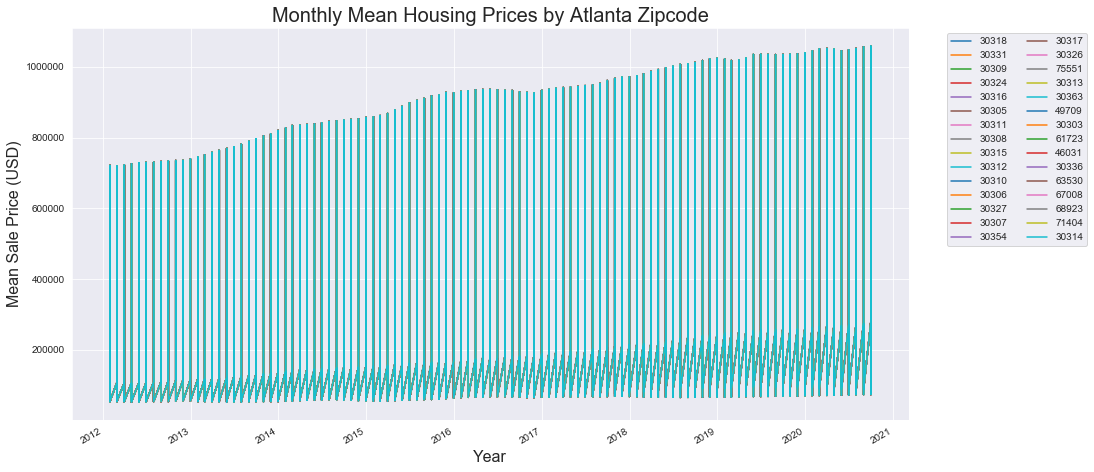

In [11]:
for zipcode in atl_month['ZipCode'].unique():
    atl_month['ZHVI'].plot(figsize=(15,8), label=zipcode)
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Mean Sale Price (USD)", fontsize=16)
plt.title("Monthly Mean Housing Prices by Atlanta Zipcode", fontsize=20);

In [ ]:
# temp_atl = atl_month.loc[(atl_month['ZipCode'] == 30318)]
# temp_atl['ZHVI'].plot(figsize=(15,8), label=zipcode)
# plt.legend(bbox_to_anchor=(1.04,1), loc="upper left", ncol=2)
# plt.xlabel("Year", fontsize=16)
# plt.ylabel("Mean Sale Price (USD)", fontsize=16)
# plt.title("Monthly Mean Housing Prices by Atlanta Zipcode", fontsize=20);

In [25]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(atl_month, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\baboo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\baboo\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.ZHVI   No. Observations:                 3123
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -42087.555
Method:                       css-mle   S.D. of innovations         172405.043
Date:                Wed, 28 Oct 2020   AIC                          84189.110
Time:                        17:33:01   BIC                          84231.436
Sample:                             1   HQIC                         84204.304
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -6.6811   1272.639     -0.005      0.996   -2501.008    2487.646
ar.L1.D.ZHVI    -0.3346      0.018    -18.875      0.000      -0.369      -0.300
ar.L2.D.ZHVI    -0.4333      0.019    -23.34

predicted=149987.795834, expected=81844.000000
predicted=71363.836521, expected=53597.000000
predicted=91839.181378, expected=78982.000000
predicted=92295.895902, expected=58492.000000
predicted=72804.738590, expected=137248.000000
predicted=125736.289731, expected=108708.000000
predicted=92035.755265, expected=243872.000000
predicted=175554.500246, expected=286344.000000
predicted=211640.060826, expected=163009.000000
predicted=122298.383259, expected=392760.000000
predicted=339292.321570, expected=70129.000000
predicted=92328.482834, expected=189247.000000
predicted=217947.066390, expected=72336.000000
predicted=178606.788344, expected=204234.000000
predicted=161207.116698, expected=69601.000000
predicted=155742.147924, expected=483852.000000
predicted=331621.818827, expected=820026.000000
predicted=565832.287077, expected=383886.000000
predicted=214493.624380, expected=57744.000000
predicted=222774.262778, expected=68730.000000
predicted=250895.796170, expected=243530.000000
predict

predicted=135850.311280, expected=174970.000000
predicted=198482.985402, expected=216832.000000
predicted=207586.926793, expected=59724.000000
predicted=85497.240570, expected=123076.000000
predicted=189608.226280, expected=79567.000000
predicted=105947.445229, expected=144830.000000
predicted=131043.314063, expected=138800.000000
predicted=149477.932139, expected=82784.000000
predicted=73578.984160, expected=58097.000000
predicted=94802.343936, expected=75913.000000
predicted=91585.692092, expected=59937.000000
predicted=76525.451864, expected=147286.000000
predicted=130685.921694, expected=115540.000000
predicted=94515.231720, expected=253366.000000
predicted=182334.815014, expected=298651.000000
predicted=220929.375040, expected=177600.000000
predicted=132474.220575, expected=408226.000000
predicted=350178.617729, expected=73959.000000
predicted=103013.886761, expected=196016.000000
predicted=224948.434247, expected=73236.000000
predicted=185561.463478, expected=214246.000000
predic

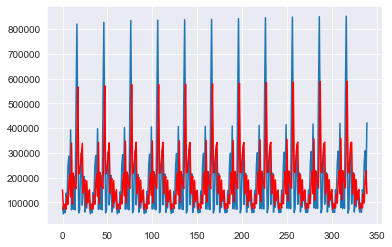

In [33]:
atl_months = atl_months[0:1000]
from sklearn.metrics import mean_squared_error
X = atl_months.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

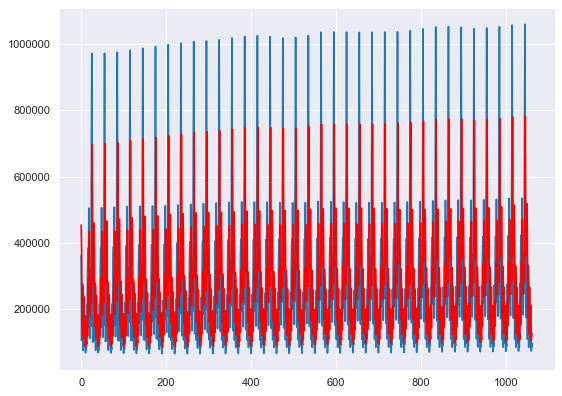

In [32]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [57]:
atl_month_two = atl_new.set_index('Month')
atl_month_two = atl_month_two.loc[(atl_month_two['ZipCode'] == 30318)]
atl_month_two

,ZipCode,ZHVI
Month,,
2012-01-31,30318,107240.0
2012-02-29,30318,106558.0
2012-03-31,30318,106442.0
2012-04-30,30318,106435.0
2012-05-31,30318,107066.0
...,...,...
2020-05-31,30318,268581.0
2020-06-30,30318,270307.0
2020-07-31,30318,272380.0


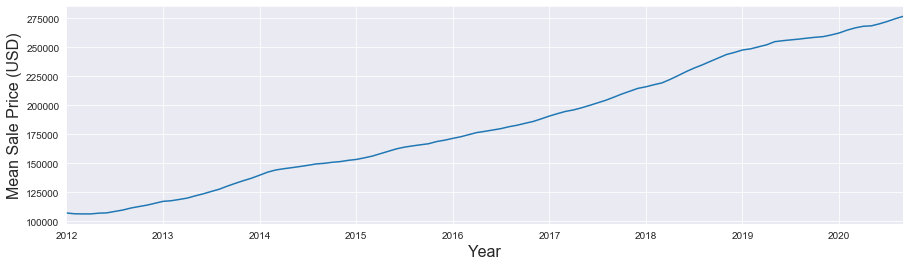

In [58]:
atl_month_two['ZHVI'].plot(figsize=(15,4), label=30318)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Mean Sale Price (USD)", fontsize=16);

In [61]:
# Make a dictionary for each zipcode
atlanta = {}
for zipcode in atl_new['ZipCode'].unique():
    atl_zip_df = atl_new[atl_new['ZipCode'] == zipcode].set_index('Month')
    atl_zip_df.drop('ZipCode', axis=1, inplace=True)
    atlanta[zipcode] = atl_zip_df

In [62]:
# Log transform the values
ATL_log ={}
for zipcode in atlanta.keys():
    ATL_log[zipcode] = np.log(atlanta[zipcode])

In [63]:
# Differencing the log-transformed values
ATL_log_diff = {}
for key in list(atlanta.keys()):
    ATL_log_diff[key] = ATL_log[key].diff(periods=12).dropna()

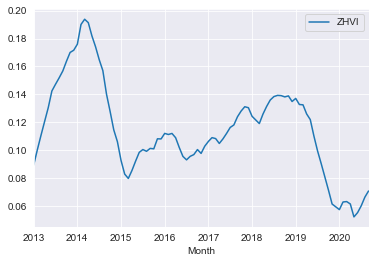

In [65]:
ATL_log_diff[30318].plot();

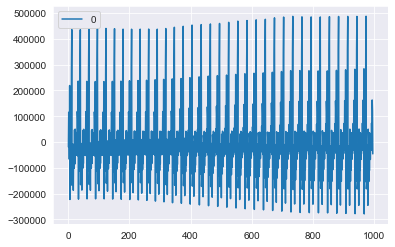

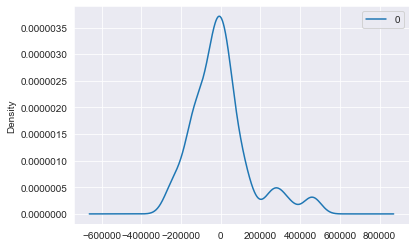

                   0
count     998.000000
mean        3.741637
std    150071.646439
min   -278802.057992
25%    -98255.700386
50%    -15749.713819
75%     42239.529639
max    487944.917234


In [66]:
# print residual errors
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
print(residuals.describe())